In [3]:
## 1. tensorflow module 설치(cpu 용)
##     > conda install tensorflow
import tensorflow as tf

In [40]:
## 2. Hello World 출력
##    상수를 하나 만들어요(상수 Node 생성)
##    Tensorflow Node는 숫자 연산과 데이터 입출력을 담당
##    Session을 이용해서 Node를 실행시켜야지
##    Node가 가지고 있는 데이터를 출력할 수 있어요!

my_node = tf.constant("Hello World")

sess = tf.Session()
sess.run(my_node)
print(sess.run(my_node).decode())

Hello World


In [9]:
## TensorFlow : Google이 만든 machine library
##              open source library
##              수학적 계산을 하기 위한 library
##              data flow graph를 이용해요!

## data flow graph는 Node와 Edge로 구성된 방향성 있는
## graph

## Node : 데이터의 입출력과 수학적 연산
## Edge : Tensor를 Node로 실어 나르는 역할
## Tensor : 동적 크기의 다차원 배열을 지칭

In [36]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
node3 = node1 + node2

# 그래프를 실행시키는 거에요. 그래프를 실행시키기 위해서 특정 러너가 필요해요
## 그래프를 실행시키기 위해 runner역할을 하는 Session객체가 있어야 해요

sess = tf.Session() # 얘가 있어야지 우리가 위해서 그린 그래프를 "실행"시킬 수 있습니다.

# print(sess.run(node3)) # node3을 실행하면 node1과 node2가 자동으로 실행되 계산된다음 node3이 실행된다~!
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [44]:
import tensorflow as tf
# placeholder를 이용
# 2개의 수를 입력으로 받아서 더하는 프로그램
node1 = tf.placeholder(dtype=tf.float32) # 데이터를 가지고있는 장소 // 입력 파라메터를 받아 들이기 위한 변수 // 받아와서 꽝 하고 받가놓는거
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1 + node2
sess=tf.Session()
result = sess.run(node3, feed_dict={node1:10, node2:20}) # node1이랑 node2에 값넣어주기~
print(result)

30.0


In [49]:
import tensorflow as tf

node1 = tf.constant([10,20,30], dtype=tf.int32)
print(node1)
node2 = tf.cast(node1, dtype=tf.float32) # node1을 형변환 하겠따 float32로 바꿔서 node2에 저☆장
print(node2)

Tensor("Const_52:0", shape=(3,), dtype=int32)
Tensor("Cast_7:0", shape=(3,), dtype=float32)


In [1]:
import tensorflow as tf

# training data set
x = [1,2,3]
y = [1,2,3] # label

# 선형회귀(linear regression)
# 가장 큰 목표는 가설의 완성
# 가설(hypothesis) = Wx + b
# W와 b를 정의
# Weight & bias 정의
W = tf.Variable(tf.random_normal([1]), name="weight") # tensor node
b = tf.Variable(tf.random_normal([1]), name="bias") # tensor node

# Hypothesis(가설)
# 우리의 최종 목적은 training data에 가장 근접한
# Hypothesis를 만드는 것(W와 b를 결정)
# 잘 만들어진 가설은 W가 1에 가깝고, b가 0에 가까워야 해요
H = W * x + b

# cost(loss) function
# cost는 0으로 수렴 // train을 한번하면 cost값이 줄어들어 0이면 좋은거네 accuracy가 올라감 
################### 우리의 목적은 cost 함수를 최소로 만드는 W와 b를 구하는 거에요 ##########################
cost = tf.reduce_mean(tf.square(H - y)) # 가설에서 우리한테 제공된 y 값을 빼서 제곱의 으으으으음~

## cost function minimize 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## runner 생성
sess = tf.Session()
## global variable의 초기화
sess.run(tf.global_variables_initializer())

## 학습진행
for step in range(3000):
    _, w_val, b_val, cost_val = sess.run([train,W,b,cost])
    if step % 300 == 0:
        print("{}, {}, {}" .format(w_val, b_val, cost_val))

Instructions for updating:
Colocations handled automatically by placer.
[-0.77335095], [-0.62896013], 24.71033477783203
[0.9729401], [0.06151364], 0.0005454455967992544
[0.9868555], [0.02988051], 0.00012870087812189013
[0.99361503], [0.01451453], 3.036792804778088e-05
[0.9968984], [0.00705055], 7.16581553206197e-06
[0.9984933], [0.00342493], 1.6907873714444577e-06
[0.99926805], [0.00166391], 3.990714958490571e-07
[0.99964416], [0.00080876], 9.43094491390184e-08
[0.9998267], [0.00039348], 2.2345318484440213e-08
[0.99991566], [0.00019159], 5.293524285576723e-09


In [19]:
import tensorflow as tf

# training data set
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

x_data = [1,2,3,4]    #               100
y_data = [4,7,10,13]  # label data    301

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight") # 상수값이아니고 계속 변해야 하는 값 // 초기값 줘야함
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * x + b

# cost(loss) function
cost = tf.reduce_mean(tf.square(H-y)) # 이차함수 모향이구만 이거의 최소값을 찾는게 목표?

# cost function을 최소화 시키기 위한 작업
# 경사하강법 : 산정상에서 최단시간 하산하기위해 내 위치에서 주변을 둘러봐 경사가 가장 급한곳으로 내려가 다시거기서 주변을 둘러봐 경사가 가장급한곳으로 내려가기를 반복
# 그래프에서 미분작업을 통해 가장 경사가 급한 곳을 찾는겨
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # learning_rate가 작으면 현재위치에서 쬐끔만 움직이는 느낌!
                                                                  # 너무작으면 실제로 아래까지 내려가는데 한참걸리고 너무 크면 엄한데로 갈수 있다.
optimizer.minimize(cost) # cost함수를 최소화 시키는겁니다 // 그러나 한번 슥 들러본다고 경사가 가장낮은곳을 찾을수 있나요 ? 없어요!
                         # 그래서 이걸 반복해야됨
    
train = optimizer.minimize(cost)

# session & 초기화
sess = tf.Session() # 러너 만들고
sess.run(tf.global_variables_initializer()) # 전역변수 초기화


# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data}) # 변하는 x,y_data값 넣어서 cost값만 찍어보겟다

    if step % 300 == 0:
         print(cost_val)
            
# prediction
print(sess.run(H, feed_dict={x : [300]}))

# 우리가 사용하는 cost함수가 만약 3차 이상의 함수면 잘못된 결과 나올수 있따리
# cost function은 convex function 형태가 되어야 gradient descent algorithm을 사용할 수 있따

115.92273
6.700222e-06
1.1100875e-06
1.8413726e-07
3.067953e-08
5.107566e-09
8.618599e-10
1.9953461e-10
6.7757355e-11
6.7757355e-11
[901.0022]


In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action = "ignore")

In [55]:
df = pd.read_csv("./data/ozone/ozone.csv", sep=",")
# display(df)

In [30]:
## 온도에 따른 오존량 예측
## 필요한 컬럼만 일단 추출
df2 = df[["Ozone","Temp"]]
## 결치값을 처리(제거)
df3 = df2.dropna(how="any", inplace=False)
print(df2.shape)
print(df3.shape)

(153, 2)
(116, 2)


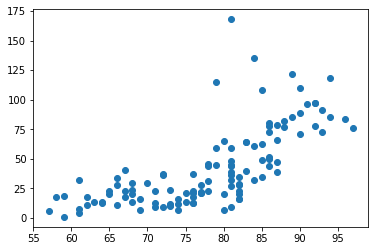

In [33]:
# 이렇게 준비한 데이터가 linear한 데이터인지 확인
plt.scatter(df3["Temp"],df3["Ozone"])
plt.show()

In [47]:
# placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# training data set
# 데이터 정제
x_data = df3["Temp"]
y_data = df3["Ozone"]
x_data = (df3["Temp"]-df3["Temp"].min())/(df3["Temp"].max()-df3["Temp"].min())
y_data = (df3["Ozone"]-df3["Ozone"].min())/(df3["Ozone"].max()-df3["Ozone"].min())

# Weithgt & bias
W = tf.Variable(tf.random_normal([1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
H = W * x + b

# cost function
cost = tf.reduce_mean(tf.square(H-y))

# 최소화 노드생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# session 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습(train)
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={x:x_data, y:y_data})
    if step % 300 == 0:
        print("cost : {}" .format(cost_val))


cost : 1.3159098625183105
cost : 0.019994698464870453
cost : 0.019817780703306198
cost : 0.01981683447957039
cost : 0.01981682889163494
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792
cost : 0.019816827028989792


In [78]:
# normalization : (요소값 - 최소값) / (최대값 - 최소값)
# standardization : (요소값 - 평균) / 표준편차
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [52]:
import tensorflow as tf

# training data set 
x_data = [[73,80,75],  # 열의 갯수는 변하지 않아유~ 사람이 많아지면 행의 갯수가 많아지지
         [93,88,93],
         [89,91,90],
         [96,98,100],
         [73,66,70]]

y_data = [[152],[185],[180],[196],[142]]

# placeholder # 입력받아 쓰는 변수!?
X = tf.placeholder(shape=[None,3], dtype=tf.float32) # 행의 갯수는 변할 수 있기 때문에, None(행의 갯수는 상관하지 않겠어!)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = W * x + b # 일반 숫자 곱
H = tf.matmul(X,W) + b # 행렬 곱 함수! // X가 먼저임에 주의

# Cost function
cost = tf.reduce_mean(tf.square(H - Y))

# 학습노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print(cost_val)

84699.914
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [83]:
df2=df.dropna(how="any", inplace=False)
display(df.shape)
display(df2.shape)
display(df)

x_data = df2[["Solar.R","Wind","Temp"]]
y_data = df2[["Ozone"]].values.reshape(-1,1)

normalized_x_data = (x_data-x_data.min())/(x_data.max()-x_data.min())
normalized_y_data = (y_data-y_data.min())/(y_data.max()-y_data.min())

X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)


W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

H = tf.matmul(X,W) + b

cost = tf.reduce_mean(tf.square(H - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:normalized_x_data, Y:normalized_y_data})
    if step % 300 == 0:
        print(cost_val)

(153, 6)

(111, 6)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


1.5667481
0.0738212
0.042762887
0.029237391
0.023088977
0.02012611
0.018587505
0.017715653
0.017174896
0.016810812


In [57]:
## multiple linear regression
## Ozone Data 학슴 및 예측
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/ozone/ozone.csv", sep =",")

# 필요한 컬럼만 추출
df.drop(["Month", "Day"],axis=1, inplace=True)
# 결치값 처리(제거)
df.dropna(how="any", inplace=True)
# x 데이터 추출
df_x = df.drop("Ozone",axis=1,inplace=False)
df_y = df["Ozone"]
df_y  ##### 주의 ##### 컬럼하나를 당겼기 때문에 series로 나와요!!! x축은 dataframe형태 y축은 series형태로 나와요

# 뽑히는 형태는 dataframe 우리가 필요한건 안의 실제 데이터 값 이거뽑으려면 어케해야되요 ?
# 기억나면 이상한거에요 그러나 기억해야되요  # df_x.values
# training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values # 1차원 배열형태로 빠지게 되요 백터형태로
                     # 그러나 우리가필요한건 2차원 메트릭스 형태!!
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) # 요로코롬하면 2차원 메트릭스로 바뀜

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = tf.matmul(X,W) + b

# cost function
cost = tf.reduce_mean(tf.square(H-Y))

# train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session&초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 진행
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print(cost_val)
        
# prediction
print(sess.run(H,feed_dict = {X:[[190,7.4,67]]})) # 데이터 3개 입력햇을때 오존(H) 이 얼마냐 ?물어보는거

print("==")
display(df_x)


0.39876223
0.08261634
0.04218209
0.026251981
0.01994464
0.017424652
0.016400881
0.015972028
0.015782459
0.015691163
0.015641741
0.015611324
0.015590376
0.0155747635
0.015562544
0.01555272
0.015544706
0.015538117
0.015532681
0.015528185
0.015524459
0.015521376
0.015518814
0.015516694
0.015514937
0.015513479
0.015512268
0.015511263
0.015510432
0.015509741
0.01550917
0.015508695
0.0155083025
0.015507973
0.015507703
0.015507476
0.015507291
0.0155071365
0.015507009
0.015506901
0.015506814
0.015506739
0.01550668
0.015506628
0.015506589
0.0155065525
0.015506525
0.0155065
0.015506481
0.015506465
0.015506451
0.015506438
0.015506429
0.015506423
0.015506415
0.015506412
0.015506408
0.0155064035
0.0155064
0.015506396
0.015506395
0.015506393
0.015506391
0.015506391
0.015506389
0.015506389
0.015506391
0.015506388
0.015506387
0.015506387
0.015506388
0.015506386
0.015506386
0.015506385
0.015506385
0.015506385
0.015506382
0.015506387
0.015506385
0.015506385
0.015506384
0.015506385
0.015506386
0.01550638

,Solar.R,Wind,Temp
0,190.0,7.4,67
1,118.0,8.0,72
2,149.0,12.6,74
3,313.0,11.5,62
6,299.0,8.6,65
7,99.0,13.8,59
8,19.0,20.1,61
11,256.0,9.7,69
12,290.0,9.2,66
13,274.0,10.9,68


129.77151
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
0.04353742
[0.50340176]


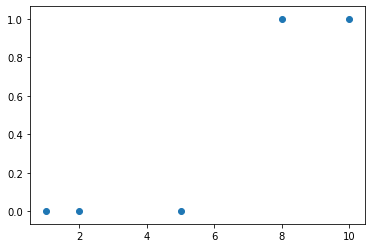

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action="ignore")

# training data set
x_data = [1,2,5,8,10] # 30시간공부해서 합격한 데이터가 들어오면 문제가 발생함
y_data = [0,0,0,1,1]

# placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * x + b

# cost function
cost = tf.reduce_mean(tf.square(H-y))

# train node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data})

    if step % 3000 == 0:
        print(cost_val)

# prediction
print(sess.run(H, feed_dict={x:[6]}))

# plot
plt.scatter(x_data,y_data)
plt.show()

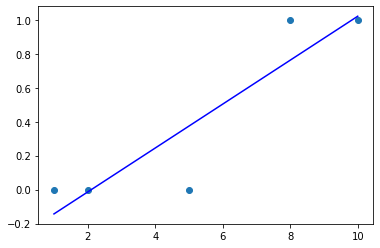

In [24]:
# plot
plt.scatter(x_data,y_data)
plt.plot(x_data,x_data * sess.run(W) + sess.run(b), "b")
plt.show()

In [49]:
import tensorflow as tf

# training data set
x_data=[[30,0],
        [10,0],
        [8,1],
        [3,3],
        [2,3],
        [5,1],
        [2,0],
        [1,0]]
y_data=[[1],[1],[1],[1],[1],[0],[0],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = tf.matmul(X,W) + b
logits = tf.matmul(X,W) + b # 아주심플하게 생각하면 직선을 곡선형태로 바꿔주는거!@!@!@@!@!@!@!@!
H = tf.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})

    if step % 3000 == 0:
        print(cost_val)

      
    
# Accuracy
# 가지고 있는 학습데이터셋을 7:3 학습과 평가를 진행
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print("정확도 : {}" .format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})) )

# prediction
print(sess.run(H, feed_dict={X:[[4,2]]}))

2.9450958
0.2674254
0.2110347
0.18509904
0.16839913
0.15591073
0.14580736
0.13725129
0.1297961
0.12317751
정확도 : 1.0
[[0.8149972]]


In [84]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action = "ignore")

df = pd.read_csv("./data/admission/admission.csv", sep=",")

# placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# x 데이터 추출
df_x = df.drop("admit",axis=1,inplace=False)
df_y = df["admit"]

x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values # 1차원 배열형태로 빠지게 되요 백터형태로
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) # 요로코롬하면 2차원 메트릭스로 바뀜


# Weithgt & bias
W = tf.Variable(tf.random_normal([3,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
# H = tf.matmul(X,W) + b
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
# for step in range(30000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
#     if step % 3000 == 0:
#         print(cost_val)
    
# Accuracy
    # 가지고 있는 학습데이터셋을 7:3 학습과 평가를 진행
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print("정확도 : {}" .format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})) )

# prediction
# print(sess.run(H, feed_dict={X:[[4,2]]}))

정확도 : 0.3174999952316284


In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action = "ignore")

df = pd.read_csv("./data/titanic/train.csv", sep=",")


df.dropna(how="any", inplace=True) # NaN이 있는 모든 row 삭제

# placeholder
X = tf.placeholder(shape=[None,5], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# x 데이터 추출
df_x = df[["Pclass","Sex","Age","SibSp","Parch"]]
df_y = df["Survived"]

df_x.dropna(how="any", inplace=True)
df_x.loc[df_x["Sex"]=="male","Sex"] = 1 # 남자 1
df_x.loc[df_x["Sex"]=="female","Sex"] = 2 # 여자 2


df_x.loc[:,"Age"] = df_x["Age"]//10

# 기준선(hyperplane)을 찾아내는게 로지스틱 머쩌구



x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values # 1차원 배열형태로 빠지게 되요 백터형태로
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) # 요로코롬하면 2차원 메트릭스로 바뀜


# Weithgt & bias
W = tf.Variable(tf.random_normal([5,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

# Hypothesis
# H = tf.matmul(X,W) + b
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print(cost_val)
    
# Accuracy
# 가지고 있는 학습데이터셋을 7:3 학습과 평가를 진행
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))
print("정확도 : {}" .format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})) )

# prediction
print(sess.run(H, feed_dict={X:[[1,2,2.6,0,0]]}))
print(df_x)


1.2209947
0.4767848
0.46508515
0.4598119
0.4566083
0.45442295
0.4528536
0.4516921
0.4508131
0.45013562
정확도 : 0.7759562730789185
[[0.45172134]]
     Pclass  Sex  Age  SibSp  Parch
1         1    2  3.0      1      0
3         1    2  3.0      1      0
6         1    1  5.0      0      0
10        3    2  0.0      1      1
11        1    2  5.0      0      0
21        2    1  3.0      0      0
23        1    1  2.0      0      0
27        1    1  1.0      3      2
52        1    2  4.0      1      0
54        1    1  6.0      0      1
62        1    1  4.0      1      0
66        2    2  2.0      0      0
75        3    1  2.0      0      0
88        1    2  2.0      3      2
92        1    1  4.0      1      0
96        1    1  7.0      0      0
97        1    1  2.0      0      1
102       1    1  2.0      0      1
110       1    1  4.0      0      0
118       1    1  2.0      0      1
123       2    2  3.0      0      0
124       1    1  5.0      0      1
136       1    2  1.0      0 

In [123]:
# multinomial classfication
import tensorflow as tf

# training data set
x_data = [[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]

y_data = [[1,0,0], # one-hot encoding
         [1,0,0],
         [0,1,0],
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1]]

# placeholder
X = tf.placeholder(shape=[None,4],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([4,3]),name="weight") # 100 010 001 세개 있어서 그런듯
b = tf.Variable(tf.random_normal([3]),name="bias")

# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.nn.softmax(logits)

# Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# 이하 학습까지 동일코드
# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})

    if step % 3000 == 0:
        print(cost_val)
    
# Accuracy
# logistic => H가 0~1사이의 실수로 값 산출
#multinomial => (확률, 확률, 확률)
# 예) (0.4, 0.5, 0.1) =>
predict = tf.argmax(H,1) # 가장 큰 값이 어느 인덱스에 있는가를 알려줍니다
                         # 2차원에서 축은 가로방향
correct = tf.equal(predict, tf.argmax(Y,1)) # True가 나왔따면, 내가 추정한 데이터와 같다는 얘기 => 예측이 된다는 얘기 ?
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 :{}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))

# prediction
print(sess.run(H, feed_dict={X:[[10,7,8,5]]}))

12.588735
0.40939024
0.2952256
0.22702466
0.18242733
0.15141909
0.1288286
0.111752726
0.09845615
0.087846
정확도 :1.0
[[8.5941297e-01 1.4058703e-01 3.7286267e-09]]


In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action = "ignore")

df = pd.read_csv("./data/bmi/bmi.csv", sep=",",skiprows=3)

df.dropna(how="any", inplace=True) # NaN이 있는 모든 row 삭제
split_count = int(df.shape[0] * 0.7)
df = df.loc[:split_count,:]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,3]),name="weight")
b = tf.Variable(tf.random_normal([3]),name="bias")

# x 데이터 추출
df_x = df[["height","weight"]]
df_y = df["label"]

df_x.dropna(how="any", inplace=True)

# 기준선(hyperplane)을 찾아내는게 로지스틱 머쩌구

x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values # 1차원 배열형태로 빠지게 되요 백터형태로
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) # 요로코롬하면 2차원 메트릭스로 바뀜


# ONE-HOT Encoding #이거정확히물어보자
display(df_y)
y_data=tf.one_hot(df_y,3).eval(session=tf.Session())


# Hypothesis
logits = tf.matmul(X,W) + b
H = tf.nn.softmax(logits)


# Cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
# 실제값이랑 가설값(H)이 둘이 얼마나 유사한지 계산하는거 0~1값이며 0이면 똑같

# 이하 학습까지 동일코드
# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=30).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print(cost_val)
    
# Accuracy
# 가지고 있는 학습데이터셋을 7:3 학습과 평가를 진행
predict = tf.argmax(H,1)
display(sess.run(H, feed_dict={X:x_data, Y:y_data}))
correct = tf.equal(predict,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

print("정확도 : {}" .format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})) )

# prediction
print(sess.run(H, feed_dict={X:[[142,41]]}))
print(sess.run(H, feed_dict={X:[[141,41]]}))

ERROR! Session/line number was not unique in database. History logging moved to new session 53


0        1
1        2
2        0
3        2
4        1
5        2
6        2
7        0
8        2
9        2
10       2
11       0
12       1
13       2
14       2
15       1
16       0
17       2
18       2
19       1
20       2
21       0
22       0
23       2
24       0
25       1
26       1
27       0
28       0
29       1
        ..
13971    2
13972    2
13973    0
13974    2
13975    2
13976    2
13977    1
13978    1
13979    2
13980    1
13981    0
13982    0
13983    2
13984    2
13985    2
13986    1
13987    2
13988    2
13989    2
13990    1
13991    2
13992    0
13993    1
13994    1
13995    2
13996    2
13997    0
13998    1
13999    2
14000    0
Name: label, Length: 14001, dtype: int64

1.3804531
0.05331658
0.05223701
0.051285114
0.050435852
0.049672164
0.04898077
0.04835119
0.04777488
0.047244985


array([[3.7745203e-04, 9.9962258e-01, 4.5483830e-09],
       [4.1172229e-14, 3.0384013e-02, 9.6961606e-01],
       [9.9995053e-01, 4.9504204e-05, 7.2969104e-20],
       ...,
       [7.9914553e-06, 9.9999154e-01, 4.5407597e-07],
       [9.4334377e-17, 5.8081810e-04, 9.9941921e-01],
       [9.8835850e-01, 1.1641495e-02, 2.5957388e-13]], dtype=float32)

정확도 : 0.9827155470848083
[[1. 0. 0.]]
[[1. 0. 0.]]


In [51]:
# multinomial classification -> BMI 예제
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action = "ignore")

df = pd.read_csv("./data/bmi/bmi.csv", sep=",",skiprows=3)

df.dropna(how="any", inplace=True)
split_count = int(df.shape[0] * 0.7)
train_df = df.loc[:split_count,:]
test_df = df.loc[split_count:,:]
test_df.drop("label",axis=1,inplace= True)
t_data = MinMaxScaler().fit_transform(test_df.values)

df_x = train_df.drop("label",axis = 1, inplace = False)
# ONE-HOT Encoding
df_y = train_df["label"]


x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = tf.one_hot(df_y,3).eval(session=tf.Session())
# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# weight & bias
# logistic 3개가 모여있다~!
# W와 b 모두 3개씩!
W = tf.Variable(tf.random_normal([2,3]),name = "weight")
b = tf.Variable(tf.random_normal([3]),name = "bias")
     
# hypothesis
logits= tf.matmul(X,W)+b
H = tf.nn.softmax(logits)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict = {X:x_data,Y:y_data})
        
predict = tf.argmax(H,1)
correct = tf.equal(predict,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype = tf.float32))
print("Accuracy : {}".format(sess.run(accuracy,feed_dict = {X :x_data,Y:y_data})))

res = sess.run(tf.argmax(sess.run(H, feed_dict = {X:t_data}),1))
for i in res:
    if i == 0 : 
        print("저체중")
    elif i == 1 :
        print("표준")
    else : 
        print("과체중")
        
# prediction
print(sess.run(H, feed_dict={X:[[142,41]]}))
print(sess.run(H, feed_dict={X:[[141,41]]}))

Accuracy : 0.951217770576477
저체중
표준
과체중
저체중
저체중
표준
저체중
저체중
표준
표준
표준
저체중
저체중
표준
저체중
표준
저체중
표준
저체중
과체중
과체중
과체중
과체중
저체중
과체중
저체중
과체중
표준
저체중
과체중
표준
표준
과체중
표준
표준
과체중
과체중
표준
과체중
저체중
과체중
저체중
과체중
과체중
과체중
저체중
과체중
과체중
표준
저체중
과체중
저체중
과체중
과체중
과체중
저체중
표준
표준
과체중
표준
표준
표준
저체중
과체중
과체중
과체중
과체중
저체중
저체중
과체중
표준
저체중
저체중
과체중
저체중
표준
과체중
표준
과체중
과체중
과체중
저체중
저체중
과체중
과체중
과체중
표준
과체중
저체중
표준
과체중
표준
과체중
과체중
표준
저체중
표준
저체중
표준
표준
과체중
표준
표준
저체중
표준
과체중
표준
과체중
저체중
저체중
과체중
과체중
과체중
저체중
과체중
과체중
과체중
과체중
과체중
저체중
과체중
저체중
과체중
과체중
저체중
저체중
저체중
저체중
저체중
저체중
표준
과체중
과체중
과체중
표준
저체중
과체중
저체중
표준
저체중
과체중
저체중
과체중
과체중
과체중
표준
과체중
과체중
저체중
저체중
저체중
저체중
과체중
과체중
과체중
과체중
표준
과체중
과체중
저체중
과체중
표준
표준
저체중
과체중
과체중
표준
저체중
저체중
표준
과체중
과체중
저체중
저체중
과체중
저체중
과체중
과체중
과체중
과체중
과체중
저체중
저체중
과체중
저체중
표준
저체중
과체중
과체중
표준
표준
과체중
과체중
과체중
표준
표준
표준
과체중
저체중
저체중
표준
과체중
저체중
표준
과체중
과체중
과체중
저체중
과체중
저체중
저체중
과체중
과체중
과체중
저체중
저체중
표준
표준
과체중
저체중
저체중
과체중
저체중
과체중
표준
과체중
과체중
표준
표준
과체중
과체중
저체중
표준
과체중
과체중
저체중
저체중
표준
과체중
표준
과체중
저체중
과체중
저체중
표준
저체중
표준
과체중
과체중
저체중
저체중
저체중
과체중
저체중
저체중
저체중
과체중
과체중


저체중
과체중
과체중
저체중
저체중
과체중
표준
과체중
과체중
과체중
과체중
과체중
표준
과체중
과체중
표준
저체중
과체중
저체중
과체중
과체중
과체중
저체중
과체중
표준
과체중
표준
표준
표준
저체중
표준
표준
과체중
과체중
표준
저체중
표준
표준
저체중
표준
과체중
저체중
과체중
저체중
표준
저체중
과체중
과체중
저체중
저체중
저체중
과체중
표준
표준
과체중
표준
과체중
과체중
과체중
저체중
저체중
표준
저체중
과체중
저체중
표준
과체중
저체중
과체중
표준
과체중
과체중
표준
과체중
과체중
과체중
과체중
과체중
저체중
저체중
과체중
과체중
저체중
표준
과체중
저체중
과체중
과체중
과체중
저체중
표준
표준
과체중
저체중
저체중
표준
표준
표준
과체중
표준
저체중
표준
표준
저체중
저체중
저체중
과체중
표준
저체중
과체중
표준
과체중
저체중
저체중
저체중
저체중
저체중
과체중
저체중
저체중
저체중
표준
과체중
저체중
저체중
표준
저체중
저체중
과체중
과체중
표준
저체중
저체중
과체중
과체중
저체중
과체중
표준
저체중
과체중
과체중
과체중
과체중
과체중
표준
과체중
저체중
과체중
표준
과체중
표준
과체중
과체중
표준
과체중
표준
과체중
과체중
표준
표준
과체중
과체중
과체중
저체중
저체중
저체중
표준
과체중
과체중
표준
과체중
과체중
저체중
표준
표준
저체중
표준
과체중
과체중
과체중
표준
저체중
표준
저체중
저체중
표준
저체중
저체중
표준
저체중
과체중
과체중
표준
과체중
과체중
과체중
과체중
과체중
과체중
과체중
과체중
과체중
표준
과체중
과체중
표준
표준
표준
저체중
저체중
과체중
과체중
표준
표준
과체중
과체중
표준
저체중
과체중
표준
저체중
표준
저체중
과체중
과체중
표준
과체중
과체중
과체중
표준
저체중
과체중
표준
과체중
표준
표준
저체중
저체중
저체중
저체중
과체중
표준
표준
저체중
과체중
과체중
과체중
과체중
과체중
저체중
표준
과체중
저체중
저체중
표준
과체중
과체중
표준
저체중
저체중
저체중
저체중
과체중
저체중
과체중
표준
과체중
저체중
표

저체중
과체중
저체중
저체중
표준
저체중
저체중
표준
과체중
저체중
과체중
과체중
과체중
과체중
표준
과체중
과체중
저체중
표준
표준
저체중
저체중
과체중
저체중
표준
저체중
저체중
표준
저체중
저체중
과체중
과체중
표준
저체중
저체중
과체중
저체중
표준
표준
저체중
표준
표준
과체중
저체중
저체중
표준
과체중
저체중
과체중
저체중
저체중
표준
표준
과체중
저체중
표준
과체중
저체중
표준
저체중
과체중
표준
표준
저체중
과체중
과체중
과체중
과체중
과체중
저체중
표준
표준
저체중
과체중
표준
과체중
저체중
과체중
과체중
표준
과체중
표준
저체중
과체중
저체중
표준
저체중
과체중
과체중
표준
과체중
표준
과체중
과체중
저체중
표준
과체중
저체중
저체중
과체중
표준
표준
표준
[[1. 0. 0.]]
[[1. 0. 0.]]


In [2]:
# 2.unsupervised learning(비지도 학습)
#     => training data에 label이 존재하지 않아요!
#     => clustering작업이 일반적으로 진행
# 3. 강화학습
#     => 상점과 벌점을 이용하여 점점저 더 좋은 방향으로 학습해 나가는 방식

## Supervised Learning (지도학습)
## 1. single linear regression(단순 선형회귀)
## 2. multiple linear regression(다중 선형회귀)
##     => matrix
## 3. Logistic regression (binary classfication)
## 4. Multinomial classfication

## ++ 추가 내용

In [7]:
## 기본 MNIST 예제 (multinomial classfication)
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd

# # Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# # 데이터 확인
# print(mnist.train.num_examples) # 학습용 데이터의 개수
# print(mnist.train.images.shape) # (55000,784) // 28x28이미지를 1차원 형태로 저장

# print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[3].reshape(28,28),cmap="Greys", interpolation="nearest")
# plt.show()
# # print(mnist.train.labels[0])

X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

                                     # multinomial softx를 이용해서 각각의 확률을 구하셔야 합니다
# Hypotesis
logits = tf.matmul(X,W) + b
H = tf.nn.softmax(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 사용하는 데이터의 크기가 상당히 커요!
# 데이터의 크기에 상관없이 학습하는 방식이 필요!
# epoch : traing data를 1번 학습시키는 것.
# 학습 진행
training_epoch = 30
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복 학습

for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([train,cost],
                              feed_dict = {X:batch_x,
                                           Y:batch_y})
    if step % 3 == 0:
        print(cost_val)
        
        
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result = sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})

print("정확도 : {}" .format(result))

# Prediction
## 종이에 숫자를 하나 써서 스캐너로 읽어들인 후 28*28형태의 펙셀 데이터로 변환.

# # 학습 진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step%300 == 0:
#         print(cost_val)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
6.3079076
2.3312235
1.6054523
1.3931775
1.0675359
0.81947875
1.1546594
1.0987316
0.9274542
0.97197145
정확도 : 0.8366000056266785


In [47]:
# logistic regression을 이용하여 AND 연산을 학습
#
import tensorflow as tf
# training data set
x_data =[[0,0],
        [0,1],
        [1,0],
        [1,1]]
y_data = [[0],[0],[0],[1]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1], name="weight"))
b = tf.Variable(tf.random_normal([1], name="bias"))

# hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels = Y))

# train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print(cost_val)
        
        
# Accuracy 측정
predict = tf.cast(H > 0.5, dtype = tf.float32) 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

print("{}".format(sess.run(accuracy,
                          feed_dict={X:x_data,
                                    Y:y_data})))

0.6952172
0.54800284
0.48927307
0.44736207
0.41320696
0.3845069
0.36001247
0.3388387
0.320326
0.30397463
1.0


In [49]:
# NN을 이용하여 AND 연산을 학습
#
import tensorflow as tf

# training data set
x_data = [[0,0],
         [0,1],
         [1,0],
         [1,1]]
y_data = [[0],[1],[1],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W1 = tf.Variable(tf.random_normal([2,8]), name="weight1")
b1 = tf.Variable(tf.random_normal([8]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([8,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# hypothesis
logits = tf.matmul(layer1,W2) + b2
H = tf.sigmoid(logits)

# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels = Y))
               
# train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
               
# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost],
                          feed_dict={X:x_data,
                                     Y:y_data})
    if step % 3000 == 0:
        print(cost_val)
        
# Accuracy 측정
predict = tf.cast(H > 0.5, dtype = tf.float32) 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy,
                          feed_dict={X:x_data,
                                    Y:y_data})))

0.90798664
0.67812085
0.62482977
0.52131605
0.37968928
0.24969557
0.16338745
0.112757444
0.08264651
0.0636868
정확도 : 1.0


In [5]:
## MNIST (Neural Network)
## tensorflow에 example로 포함된 MNIST예제를
## NN으로 학습 ( accuracy => 95% )
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# data loading
mnist = input_data.read_data_sets("./data/mnist",one_hot = True)

                                  
# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)  # 784 입렵
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)   # 10 출력

# Weight & bias
W1 = tf.Variable(tf.random_normal([784,256]), name="weight1")
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,256]), name="weight2")
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([256,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = Y))
               
# train node
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)
               
# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
         
training_epoch = 30
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라
                 # 100개의 행을 읽어서 반복 학습
    
for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([train,cost],
                              feed_dict = {X:batch_x,
                                           Y:batch_y})
    if step % 3 == 0:
        print(cost_val)
        
# Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result = sess.run(accuracy,
                 feed_dict = {X:mnist.test.images,
                              Y:mnist.test.labels})
print("정확도 : {}".format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000001C127DA0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000281BB080>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000281BB160>)
====


KeyboardInterrupt: 

In [59]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd

df1= pd.read_csv("./data/wati/train.csv", sep=",")
df2= pd.read_csv("./data/wati/test.csv", sep=",")
df3= pd.read_csv("./data/wati/sample_submission.csv", sep=",")

# #데이터정제
df.dropna(how="any", inplace=True)
# # NaN이 있는 모든 row 삭제

split_count = int(df.shape[0] * 0.7)
train_df = df.loc[:split_count,:]
test_df = df.loc[split_count+1:,:]


print(mnist.train.num_examples) # 학습용 데이터의 개수
print(mnist.train.images.shape) # (55000,784)  28 * 28 이미지를 1차원 형태로 저장
print(mnist.train.labels.shape)

print(mnist.test.num_examples) # 학습용 데이터의 개수
print(mnist.test.images.shape) # (55000,784)  28 * 28 이미지를 1차원 형태로 저장
print(mnist.test.labels.shape)

print(mnist.sample_submission.num_examples) # 학습용 데이터의 개수
print(mnist.sample_submission.images.shape) # (55000,784)  28 * 28 이미지를 1차원 형태로 저장
print(mnist.sample_submission.labels.shape)

55000
(55000, 784)
(55000, 10)
10000
(10000, 784)
(10000, 10)


AttributeError: 'Datasets' object has no attribute 'sample_submission'

In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

train = pd.read_csv("./data/kaggle/train.csv", sep=",")
test = pd.read_csv("./data/kaggle/test.csv", sep=",")
#display(df.head())

#데이터 정제
Y_train =train["label"]
#Drop 'label' column
X_train =train.drop(labels=["label"],axis=1)
Y_train.value_counts()

#Normalize the data
X_train = X_train/255.0
test = test /255.0

#Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [ ]:
## 스나
import tensorflow as tf
import numpy as np
import pandas as pd

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading
mnist = pd.read_csv('./data/kaggle/train.csv')
mnist_test = pd.read_csv('./data/kaggle/test.csv')
mnist = input_data.read_data_sets("./data/kaggle/train.csv",one_hot = True)

df_x = mnist.drop('label', axis=1, inplace=False)
df_y = mnist['label']

Instructions for updating:
Please use urllib or similar directly.


In [9]:
sess = tf.Session()
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(tf.one_hot(df_y, depth=10).eval(session=sess))

In [ ]:
# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)

# Weight & bias

W1 = tf.Variable(tf.random_normal([784,256]), name='weight1')
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

# 두번째  Layer .layer1의 output 개수가 layer2의 input 개수와 같아야 한다.
W2 = tf.Variable(tf.random_normal([256,256]), name='weight2')
b2 = tf.Variable(tf.random_normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')


# hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train node 생성
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


# Session & 초기화
sess.run(tf.global_variables_initializer())

training_epoch = 30
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라 100개의 행을 읽어서 반복 학습

# 학습
for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,cost_val = sess.run([train,cost],
                              feed_dict = {X:batch_x,
                                           Y:batch_y})
    if step % 3 == 0:
        print(cost_val)
        
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result = sess.run(accuracy, feed_dict = {X:mnist.test.images, Y:mnist.test.labels})

print("정확도 : {}" .format(result))

# Prediction
## 종이에 숫자를 하나 써서 스캐너로 읽어들인 후 28*28형태의 펙셀 데이터로 변환.

# # 학습 진행
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images, Y:mnist.train.labels})
    
#     if step%300 == 0:
#         print(cost_val)


In [29]:
# 기본 MNIST(multinomial classification)
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading
train_data = pd.read_csv("./data/kaggle/train.csv")
train_x_data = train_data.drop('label', axis = 1)
train_y_data = tf.one_hot(train_data["label"], depth=10).eval(session = tf.Session())
test_x_data = pd.read_csv("./data/kaggle/test.csv")

# Tensorflow Graph Initialization
tf.reset_default_graph()

X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

# Weight & bias
W1 = tf.get_variable("weight1", shape = [784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 10
batch_size = 100


# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})

    if step %5 == 0:
        print(cost_val)
        
#predict check
predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_x_data, keep_prob: 1.0})
df = pd.DataFrame({
    'ImageId': [i for i in range(1,28001)],
    'Label': result
})
df.to_csv('./data/kaggle/submission.csv', index=False)

correct = tf.equal(predict, tf.math.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data, keep_prob: 1.0})))

1.0306913
0.008812769
Accuracy: 0.9861190319061279


In [3]:
# 기본 MNIST(multinomial classification)
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading
train_data = pd.read_csv("./data/kaggle/train.csv")
train_x_data = train_data.drop('label', axis = 1)
train_y_data = tf.one_hot(train_data["label"], depth=10).eval(session = tf.Session())
test_x_data = pd.read_csv("./data/kaggle/test.csv")
df = pd.read_csv("./data/titanic/train.csv", sep=",")


# Tensorflow Graph Initialization
tf.reset_default_graph()

X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

# Weight & bias
W1 = tf.get_variable("weight1", shape = [784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

# Hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 10
batch_size = 100

display(test_x_data)

# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})

    if step %5 == 0:
        print(cost_val)
        
#predict check
predict = tf.argmax(H,1)


result = sess.run(predict, feed_dict={X:test_x_data, keep_prob: 1.0})
display(result)
print("===")
display(result.shape)
df = pd.DataFrame({
    'ImageId': [i for i in range(1,28001)],
    'Label': result
})
df.to_csv('./data/kaggle/submission.csv', index=False)

correct = tf.equal(predict, tf.math.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data, keep_prob: 1.0})))

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.81762975
0.13007276


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

===


(28000,)

Accuracy: 0.9791666865348816


In [40]:
import tensorflow as tf
import warnings 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


warnings.filterwarnings(action="ignore")

df = pd.read_csv("./data/titanic/train.csv", sep="," )

#데이터정제
df.drop(["Name","PassengerId","Ticket","Fare","Cabin"], axis=1, inplace=True)
df.dropna(how="any", inplace=True)
# NaN이 있는 모든 row 삭제
display(df)

df.loc[df["Sex"]=="male","Sex"] = 1 #남자는 1, 여자는 2
df.loc[df["Sex"]=="female","Sex"] = 2
df.loc[:,"Age"] = (df["Age"]//10) #연령을 처리하기 쉽도록 0~9세는 0, 10~19세는 1, 20~29는 2… 식으로 표현
df.loc[df["Embarked"]=="S","Embarked"] = 1 # Embarked == 1: Southampton
df.loc[df["Embarked"]=="C","Embarked"] = 2 # Embarked == 2: Cherbourg
df.loc[df["Embarked"]=="Q","Embarked"] = 3 # Embarked == 3: Queenstown




# x데이터 추출
df_x=df.drop("Survived", axis=1, inplace=False)
# # y데이터 추출
df_y = df["Survived"]

display(df.shape)

#training data set (Matrix형태 ) 
x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1))

# Tensorflow Graph Initialization
tf.reset_default_graph()

# X = tf.placeholder(shape = [None, 784], dtype = tf.float32)
# Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
# keep_prob = tf.placeholder(dtype=tf.float32)
X = tf.placeholder(shape = [None, 7], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

# Weight & bias
#W=tf.Variable(tf.random_normal([6,1]), name="weight")
#b=tf.Variable(tf.random_normal([1]), name="bias")

W1 = tf.get_variable("weight1", shape = [7,1024], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("bias1", shape = [1024], initializer=tf.contrib.layers.xavier_initializer())
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [1024,1024], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("bias2", shape = [1024], initializer=tf.contrib.layers.xavier_initializer())
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [1024,1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("bias3", shape = [10], initializer=tf.contrib.layers.xavier_initializer())

# Hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 10
batch_size = 100

# training
for step in range(training_epoch):
    num_of_iteration = int(train_data.shape[0] / batch_size)
    cost_val = 0
    
    for i in range(num_of_iteration):
        batch_x, batch_y = train_x_data[i*batch_size:(i+1)*batch_size],train_y_data[i*batch_size:(i+1)*batch_size]
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})

    if step %5 == 0:
        print(cost_val)
        

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S


(712, 7)

ValueError: Cannot feed value of shape (100, 784) for Tensor 'Placeholder:0', which has shape '(?, 7)'

In [111]:
import tensorflow as tf
import warnings 
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


warnings.filterwarnings(action="ignore")

tf.reset_default_graph()

df = pd.read_csv("./data/titanic/train.csv", sep="," )

#데이터정제
df.drop(["Name","PassengerId","Ticket","Cabin"], axis=1, inplace=True)
# NaN이 있는 모든 row 삭제

df.fillna(method="ffill",inplace = True)

df.loc[df["Sex"]=="male","Sex"] = 1 #남자는 1, 여자는 2
df.loc[df["Sex"]=="female","Sex"] = 2
df.loc[:,"Age"] = (df["Age"]//10) #연령을 처리하기 쉽도록 0~9세는 0, 10~19세는 1, 20~29는 2… 식으로 표현
df.loc[df["Embarked"]=="S","Embarked"] = 1 # Embarked == 1: Southampton
df.loc[df["Embarked"]=="C","Embarked"] = 2 # Embarked == 2: Cherbourg
df.loc[df["Embarked"]=="Q","Embarked"] = 3 # Embarked == 3: Queenstown
df["Fare"] = pd.qcut(df["Fare"], 5, labels=[1,2,3,4,5])

# x데이터 추출
train_x = df.drop("Survived", axis=1, inplace=False)

# # y데이터 추출
train_y = df["Survived"]

#training data set (Matrix형태 ) 
train_x_data = MinMaxScaler().fit_transform(train_x.values)
train_y_value = train_y.values
train_y_data = MinMaxScaler().fit_transform(train_y_value.reshape(-1,1))

df = pd.read_csv("./data/titanic/test.csv", sep="," )
df2 = df["PassengerId"]
#데이터정제
df.drop(["Name","PassengerId","Ticket","Cabin"], axis=1, inplace=True)

# NaN이 있는 모든 row 삭제
df.fillna(method="ffill",inplace = True)
df.loc[df["Sex"]=="male","Sex"] = 1 #남자는 1, 여자는 2
df.loc[df["Sex"]=="female","Sex"] = 2
df.loc[:,"Age"] = (df["Age"]//10) #연령을 처리하기 쉽도록 0~9세는 0, 10~19세는 1, 20~29는 2… 식으로 표현
df.loc[df["Embarked"]=="S","Embarked"] = 1 # Embarked == 1: Southampton
df.loc[df["Embarked"]=="C","Embarked"] = 2 # Embarked == 2: Cherbourg
df.loc[df["Embarked"]=="Q","Embarked"] = 3 # Embarked == 3: Queenstown
df["Fare"] = pd.qcut(df["Fare"], 5, labels=[1,2,3,4,5])

# x데이터 추출
#test_x = df.drop("Survived", axis=1, inplace = False)  # y데이터 추출
test_x = df

#training data set (Matrix형태 ) 
test_x_data = MinMaxScaler().fit_transform(test_x.values)

# Tensorflow Graph Initialization
tf.reset_default_graph()

X = tf.placeholder(shape = [None, 7], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

# Weight & bias
#W=tf.Variable(tf.random_normal([6,1]), name="weight")
#b=tf.Variable(tf.random_normal([1]), name="bias")

W1 = tf.get_variable("weight1", shape = [7,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("bias1", shape = [256], initializer=tf.contrib.layers.xavier_initializer())
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("bias2", shape = [256], initializer=tf.contrib.layers.xavier_initializer())
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [256,1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("bias3", shape = [1], initializer=tf.contrib.layers.xavier_initializer())

# Hypothesis
logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

# cost function
#cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits_v2(logits = logits, labels = Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))
# train node
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session object & initialization
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# epoch & batch size
training_epoch = 10


# training
for step in range(training_epoch):
    num_of_iteration = int(train_x_data.shape[0])
    cost_val = 0
    
    for i in range(num_of_iteration):
        _, cost_val = sess.run([train, cost], feed_dict={X: train_x_data, Y: train_y_data, keep_prob: 1.0})

    if step %5 == 0:
        print(cost_val)


#predict check

result = sess.run(tf.cast(sess.run(H, feed_dict = {X:test_x_data,keep_prob:1.0}) > 0.5,dtype = tf.int32))
# print("===")
# display(result.shape)
result = result[:,0]
(result.shape)
# display(result.shape)


df = pd.DataFrame({ 
     'PassengerId': df2,
     'Survived': result
})
df.to_csv('./data/titanic/submission7.csv', index=False)
# correct = tf.equal(predict, Y)
# accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("Accuracy: {}".format(sess.run(accuracy, feed_dict = {X: train_x_data, Y: train_y_data,keep_prob : 1.0})))

0.23567428
0.20542742


ValueError: Fetch argument <tf.Tensor 'Mean_1:0' shape=() dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("Mean_1:0", shape=(), dtype=float32) is not an element of this graph.)

In [112]:
## Titanic 세환햄

from sklearn.preprocessing import LabelEncoder, Imputer, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = "ignore")

tf.reset_default_graph()

train_data = pd.read_csv("./data/titanic/train.csv")
test_data = pd.read_csv("./data/titanic/test.csv")

def fill_nan(data, columns):
    for column in columns:
        data[column] = Imputer().fit_transform(data[column].values.reshape(-1,1))
    return data

train_data = fill_nan(train_data, ["Age", "SibSp", "Parch"])
test_data = fill_nan(test_data, ["Age", "SibSp", "Parch"])

test_pid = test_data["PassengerId"]
train_data.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis = 1, inplace = True)
test_data.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"],axis = 1, inplace = True)

def dummy_data(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data.drop(column, axis=1)
    return data

train_data = dummy_data(train_data, "Pclass")
test_data = dummy_data(test_data, "Pclass")

def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male", "female"])
    data["Sex"] = le.transform(data["Sex"])
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)

train_data["Age"] = MinMaxScaler().fit_transform(train_data["Age"].values.reshape(-1,1))
test_data["Age"] = MinMaxScaler().fit_transform(test_data["Age"].values.reshape(-1,1))

def split(data):
    data_y = LabelBinarizer().fit_transform(data["Survived"])
    data_x = data.drop(["Survived"], axis=1)
    
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.2)
    
    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split(train_data)

X = tf.placeholder(shape=[None, train_x.shape[1]], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

W1 = tf.get_variable("weight1", shape = [train_x.shape[1],256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob = keep_prob)

W2 = tf.get_variable("weight2", shape = [256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)
layer2 = tf.nn.dropout(_layer2, keep_prob = keep_prob)

W3 = tf.get_variable("weight3", shape = [256,1], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([1]), name="bias3")

logits = tf.matmul(layer2,W3) + b3
H = tf.nn.relu(logits)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epoch = 100

for epoch in range(training_epoch):
    _, cost_val = sess.run([train, cost], feed_dict={X: train_x, Y: train_y, keep_prob: 1.0})
#     print("epoch: {0}, cost: {1}".format(epoch, cost_val))
    
predict = tf.cast(H > 0.5, dtype=tf.float32)
result = sess.run(predict, feed_dict={X: test_data, keep_prob: 1.0})
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy: {}".format(sess.run(accuracy, feed_dict={X: valid_x, Y: valid_y, keep_prob: 1.0})))
print(type(result))
print(result.shape)
df = pd.DataFrame(test_pid, columns=["PassengerId"])
df_survived = pd.DataFrame(result, columns=["Survived"], dtype=np.int64)
df = df.join(df_survived)

display(df)

df.to_csv("./data/titanic/submission.csv", index=False)

Accuracy: 0.7932960987091064
<class 'numpy.ndarray'>
(418, 1)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


PermissionError: [Errno 13] Permission denied: './data/titanic/submission.csv'